# Sentiment based Product Recommendation System - Rohit & Ishita

In [1]:
# Importing necessary Libraries

import re
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from datetime import datetime

# Supressing the Warnings
import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.precision", 2)
import string

# Importing Scikit-learn specific Libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics.pairwise import pairwise_distances, cosine_similarity

# Importing NLTK specific Libraries
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet

import time
from sklearn import metrics
import pickle

[nltk_data] Error loading stopwords: <urlopen error [WinError 10054]
[nltk_data]     An existing connection was forcibly closed by the
[nltk_data]     remote host>
[nltk_data] Error loading punkt: <urlopen error [WinError 10054] An
[nltk_data]     existing connection was forcibly closed by the remote
[nltk_data]     host>
[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [WinError 10054] An existing connection was forcibly
[nltk_data]     closed by the remote host>
[nltk_data] Error loading wordnet: <urlopen error [WinError 10054] An
[nltk_data]     existing connection was forcibly closed by the remote
[nltk_data]     host>
[nltk_data] Error loading omw-1.4: <urlopen error [WinError 10054] An
[nltk_data]     existing connection was forcibly closed by the remote
[nltk_data]     host>


In [2]:
# Reading data from the input file

user_sentiment = pd.read_csv(r"dataset\sample30.csv")

In [3]:
# Viewing the imported dataset

user_sentiment.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


In [4]:
# Info about columns with their datatypes & null counts

user_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [5]:
# We see from above that there are some columns with null values, hence identifying them

user_sentiment.isnull().sum()

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
dtype: int64

In [6]:
# Removing null values from the "user_sentiment" column

user_sentiment=user_sentiment[~user_sentiment['user_sentiment'].isnull()]

In [7]:
# Checking null values again for "user_sentiment" column

user_sentiment['user_sentiment'].isnull().sum()

0

In [8]:
# Counting the values of the "user_sentiment" column

user_sentiment['user_sentiment'].head()

0    Positive
1    Positive
2    Positive
3    Negative
4    Negative
Name: user_sentiment, dtype: object

In [9]:
# Mapping the "user_sentiment" column to binary values

user_sentiment['user_sentiment']=user_sentiment['user_sentiment'].map({"Positive":1,"Negative":0})

In [10]:
# Viewing the resultant column

user_sentiment['user_sentiment'].head()

0    1
1    1
2    1
3    0
4    0
Name: user_sentiment, dtype: int64

<AxesSubplot:xlabel='user_sentiment', ylabel='count'>

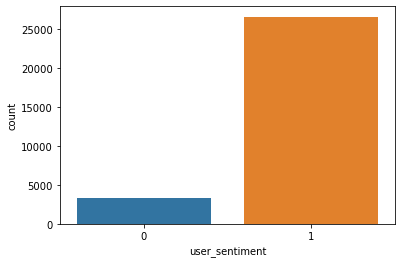

In [11]:
# Plotting count plot for the "user_sentiment" column

sns.countplot(x='user_sentiment',data=user_sentiment)

In [12]:
# Percentage of +ve and -ve value for "user_sentiment" column

user_sentiment['user_sentiment'].value_counts(normalize=True)

1    0.89
0    0.11
Name: user_sentiment, dtype: float64

##### Observation:
- From the above result, it is clearly visible that 89% users have given +ve response and 11% users have given -ve response.

In [13]:
# Describing the "reviews_rating" column

user_sentiment['reviews_rating'].describe()

count    29999.00
mean         4.48
std          0.99
min          1.00
25%          4.00
50%          5.00
75%          5.00
max          5.00
Name: reviews_rating, dtype: float64

In [14]:
# Counting the values of the "reviews_rating" column

user_sentiment['reviews_rating'].value_counts()

5    20830
4     6020
1     1384
3     1345
2      420
Name: reviews_rating, dtype: int64

<AxesSubplot:xlabel='reviews_rating', ylabel='count'>

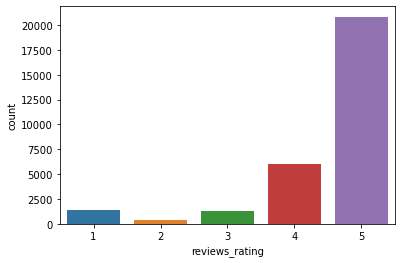

In [15]:
# Plotting the count of different ratings in the "reviews_rating" column

sns.countplot(x='reviews_rating',data=user_sentiment)

In [16]:
# Reviewing 1 ratings

user_sentiment[user_sentiment["user_sentiment"]==1]["reviews_rating"].describe()

count    26632.00
mean         4.56
std          0.87
min          1.00
25%          4.00
50%          5.00
75%          5.00
max          5.00
Name: reviews_rating, dtype: float64

In [17]:
# Reviewing 0 ratings

user_sentiment[user_sentiment["user_sentiment"]==0]["reviews_rating"].describe()

count    3367.00
mean        3.87
std         1.54
min         1.00
25%         3.00
50%         5.00
75%         5.00
max         5.00
Name: reviews_rating, dtype: float64

In [18]:
# Interpreting the "user_sentiment" and the "reviews_rating" columns together

pd.crosstab(user_sentiment['user_sentiment'],user_sentiment['reviews_rating'],margins=True)

reviews_rating,1,2,3,4,5,All
user_sentiment,,,,,,
0,597,140,220,550,1860,3367
1,787,280,1125,5470,18970,26632
All,1384,420,1345,6020,20830,29999


In [19]:
# Analyzing the data for the one who have positive sentiment but ratings are less and vice-versa

user_sentiment[(user_sentiment['user_sentiment']==1) & (user_sentiment['reviews_rating']<4)][["reviews_title","reviews_text", "reviews_rating"]]

,reviews_title,reviews_text,reviews_rating
9,Don't buy,Got as a surprise for my husband there is noth...,1
11,Waste of Money,Purchased this thinking it would have some sor...,1
14,Disappointed,First time purchase of this type of product. M...,1
18,Pretty nice,I bought this because it had better reviews th...,3
54,New formula is terrible,I used (and loved) this product for several ye...,1
...,...,...,...
29050,Didn't Do Much For Dryness,I received this product from Influenster. I ab...,3
29051,Not the best,I used this product for a month straight befor...,3
29053,clay conditioning,Got this item as a compliment from influenster...,3
29054,Eh,I am not in love with the conditioner. The cla...,3


In [20]:
# Analyzing the data for the one who have positive sentiment but ratings are less and vice-versa

user_sentiment[(user_sentiment['user_sentiment']==0) & (user_sentiment['reviews_rating']>=4)][["reviews_title","reviews_text", "reviews_rating"]]

,reviews_title,reviews_text,reviews_rating
92,hydrating but not too heavy,It hydrates my skin. It is not too thick and h...,4
96,This product has made a real difference on my ...,In only a week I can see the difference in my ...,4
100,Noticed a difference in just two weeks!,This product has made my skin smoother and sup...,4
106,Very rich cream,I like to use this cream on my neck and collar...,4
117,Not greasy,I finally found a moisturizing product that wi...,4
...,...,...,...
29818,Great Product,I received a complimentary sample of this prod...,5
29855,Great,This has prolonged the color in my hair! Not o...,5
29858,Makes my hair soft and shiny without excess oil!,This conditioner makes my hair very soft witho...,5
29862,Great Conditioner,This conditioner has become a staple in my hai...,5


In [21]:
# Updating the user_sentiment to 0 (but was 1) when the reviews_rating is less than 4, and updating the user_sentiment to 1(but was 0), when the reviews_rating is greater than or equal to 4

user_sentiment.loc[(user_sentiment["user_sentiment"]==1) & (user_sentiment["reviews_rating"]<4), "user_sentiment"] = 0

In [22]:
user_sentiment.loc[(user_sentiment["user_sentiment"]==0) & (user_sentiment["reviews_rating"]>=4), "user_sentiment"] = 1

In [23]:
# Again Interpreting user_sentiment and reviews_rating column together

pd.crosstab(user_sentiment['user_sentiment'],user_sentiment['reviews_rating'],margins=True)

reviews_rating,1,2,3,4,5,All
user_sentiment,,,,,,
0,1384,420,1345,0,0,3149
1,0,0,0,6020,20830,26850
All,1384,420,1345,6020,20830,29999


In [24]:
# Reviewing the result

user_sentiment.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,1
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,1
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,1
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,0
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,0


In [25]:
# Reviewing the result

user_sentiment['brand'].head()

0    Universal Music
1           Lundberg
2           Lundberg
3                K-Y
4                K-Y
Name: brand, dtype: object

In [26]:
# Counting the values for the "brand" column

user_sentiment['brand'].value_counts()

Clorox                       10585
Warner Home Video             3325
Disney                        1199
L'oreal Paris                 1186
FOX                            887
                             ...  
Yosemite Home Decor              1
Carson-Dellosa Publishing        1
Teamson                          1
iStarUSA                         1
Noosa                            1
Name: brand, Length: 214, dtype: int64

<AxesSubplot:xlabel='brand'>

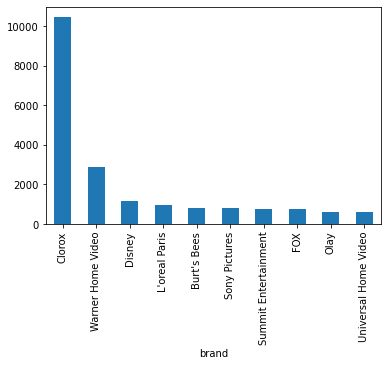

In [27]:
# Plotting the top 10 brand who have received positive response by count

user_sentiment[user_sentiment['user_sentiment']==1].groupby('brand')['brand'].count().sort_values(ascending=False)[:10].plot(kind='bar')

<AxesSubplot:xlabel='brand'>

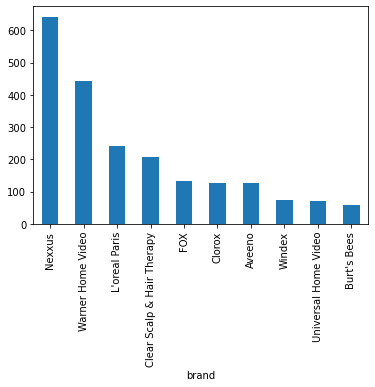

In [28]:
# Plotting the top 10 brand who have received negative response by count

user_sentiment[user_sentiment['user_sentiment']==0].groupby('brand')['brand'].count().sort_values(ascending=False)[:10].plot(kind='bar')

In [29]:
# Counting the values for the "manufacturer" column

user_sentiment['manufacturer'].value_counts()

Clorox                           8546
Test                             3325
AmazonUs/CLOO7                   2039
L'oreal Paris                    1232
Walt Disney                      1142
                                 ... 
SBME SPECIAL MKTS.                  1
LDR                                 1
Teamson                             1
Pacific Foods of Oregon, Inc.       1
iStarUSA                            1
Name: manufacturer, Length: 227, dtype: int64

<AxesSubplot:xlabel='manufacturer'>

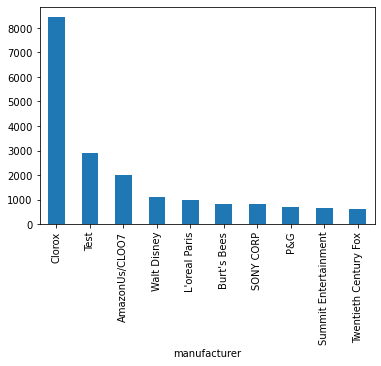

In [30]:
# Plotting top 10 manufacturer who have received positive response by count

user_sentiment[user_sentiment['user_sentiment']==1].groupby('manufacturer')['manufacturer'].count().sort_values(ascending=False)[:10].plot(kind='bar')

<AxesSubplot:xlabel='manufacturer'>

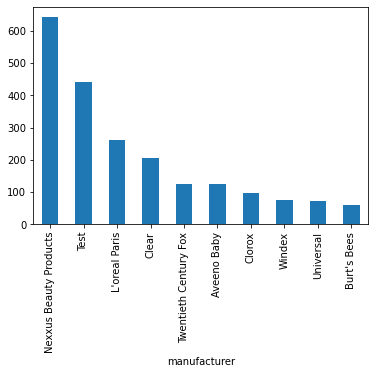

In [31]:
# Plotting the top 10 manufacturer who have received negative response by count

user_sentiment[user_sentiment['user_sentiment']==0].groupby('manufacturer')['manufacturer'].count().sort_values(ascending=False)[:10].plot(kind='bar')

In [32]:
# Counting the values for the "reviews_username" column

user_sentiment['reviews_username'].value_counts()

mike                 41
byamazon customer    41
chris                32
lisa                 16
rick                 15
                     ..
caleforever16         1
stace2525             1
davegen               1
ryry                  1
birdwoman             1
Name: reviews_username, Length: 24914, dtype: int64

<AxesSubplot:xlabel='reviews_username'>

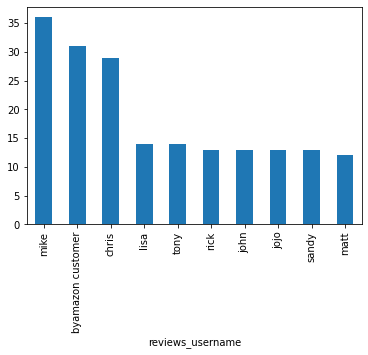

In [33]:
# Plotting the top 10 users who have given positive response by username count

user_sentiment[user_sentiment['user_sentiment']==1].groupby('reviews_username')['reviews_username'].count().sort_values(ascending=False)[:10].plot(kind='bar')

<AxesSubplot:xlabel='reviews_username'>

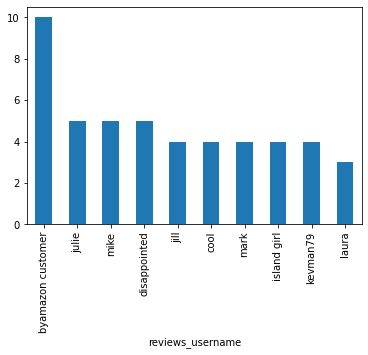

In [34]:
# Plotting the top 10 users who have given negative response by username count

user_sentiment[user_sentiment['user_sentiment']==0].groupby('reviews_username')['reviews_username'].count().sort_values(ascending=False)[:10].plot(kind='bar')

In [35]:
# Finding the null values in "username" column

user_sentiment['reviews_username'].isnull().sum()

63

In [36]:
# Removing the null values in "username" column as they are very less in number

user_sentiment=user_sentiment[~user_sentiment['reviews_username'].isnull()]

In [37]:
# Verifying the result

user_sentiment['reviews_username'].isnull().sum()

0

In [38]:
# Combining the "reviews_text" and "reviews_title" columns for better analysis

user_sentiment["reviews_title"] = user_sentiment["reviews_title"].fillna('')
user_sentiment["reviews_full_text"] = user_sentiment[['reviews_title', 'reviews_text']].agg('. '.join, axis=1).str.lstrip('. ')

In [39]:
# Veiwing the resultant dataset

user_sentiment.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment,reviews_full_text
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,1,Just Awesome. i love this album. it's very goo...
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,1,Good. Good flavor. This review was collected a...
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,1,Good. Good flavor.
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,0,Disappointed. I read through the reviews on he...
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,0,Irritation. My husband bought this gel for us....


In [40]:
# Checking for null values in the resultant dataset

user_sentiment.isnull().sum()

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               40
reviews_didPurchase     14005
reviews_doRecommend      2541
reviews_rating              0
reviews_text                0
reviews_title               0
reviews_userCity        28036
reviews_userProvince    29770
reviews_username            0
user_sentiment              0
reviews_full_text           0
dtype: int64

# Text Preprocessing for modelling


In [41]:
# Analyzing the "reviews_full_text" column

user_sentiment[['reviews_full_text','user_sentiment']].head()

,reviews_full_text,user_sentiment
0,Just Awesome. i love this album. it's very goo...,1
1,Good. Good flavor. This review was collected a...,1
2,Good. Good flavor.,1
3,Disappointed. I read through the reviews on he...,0
4,Irritation. My husband bought this gel for us....,0


In [42]:
# function to clean the text and remove all the unnecessary elements.

def clean_text(text):
    text = text.lower()
    text = text.strip()
    text = re.sub("\[\s*\w*\s*\]", "", text)
    dictionary = "abc".maketrans('', '', string.punctuation)
    text = text.translate(dictionary)
    text = re.sub("\S*\d\S*", "", text)
    
    return text

In [43]:
# Cleaning the below 4 columns with the above written function

user_sentiment_clean = user_sentiment[['id','name', 'reviews_full_text', 'user_sentiment']]

In [44]:
# Cleaning the "reviews_text" column

user_sentiment_clean["reviews_text"] = user_sentiment_clean.reviews_full_text.apply(lambda x: clean_text(x))

In [45]:
# Reviewing the result

user_sentiment_clean.head()

,id,name,reviews_full_text,user_sentiment,reviews_text
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),Just Awesome. i love this album. it's very goo...,1,just awesome i love this album its very good m...
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good. Good flavor. This review was collected a...,1,good good flavor this review was collected as ...
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good. Good flavor.,1,good good flavor
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,Disappointed. I read through the reviews on he...,0,disappointed i read through the reviews on her...
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,Irritation. My husband bought this gel for us....,0,irritation my husband bought this gel for us t...


In [46]:
# Function to get the Part of Speech tag

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [47]:
# Implementing the POS tag function

stop_words = set(stopwords.words('english'))

def remove_stopword(text):
    words = [word for word in text.split() if word.isalpha() and word not in stop_words]
    return " ".join(words)

In [48]:
# Lemmatizing the sentence

lemmatizer = WordNetLemmatizer()
def lemma_text(text):
    # Getting the Position tags
    word_pos_tags = nltk.pos_tag(word_tokenize(remove_stopword(text)))
    # Map the position tag and lemmatize the word/token
    words =[lemmatizer.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] 
    return " ".join(words)

In [49]:
# Cleaning the user reviews

user_sentiment_clean["reviews_text_cleaned"] = user_sentiment_clean.reviews_text.apply(lambda x: lemma_text(x))

In [50]:
# Reviewing the result

user_sentiment_clean.head()

,id,name,reviews_full_text,user_sentiment,reviews_text,reviews_text_cleaned
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),Just Awesome. i love this album. it's very goo...,1,just awesome i love this album its very good m...,awesome love album good hip hop side current p...
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good. Good flavor. This review was collected a...,1,good good flavor this review was collected as ...,good good flavor review collect part promotion
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good. Good flavor.,1,good good flavor,good good flavor
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,Disappointed. I read through the reviews on he...,0,disappointed i read through the reviews on her...,disappoint read review look buy one couple lub...
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,Irritation. My husband bought this gel for us....,0,irritation my husband bought this gel for us t...,irritation husband buy gel u gel caused irrita...


#### Observation:
- The "reviews_text_cleaned" column contains clean data by removing the stopwords, whitespaces, punctuation, numericals, whitespaces and lemma is derived.

In [51]:
# Using a word cloud to find the top words by frequency among all the articles after processing the text

from wordcloud import WordCloud
wordcloud = WordCloud(stopwords=stop_words,max_words=200).generate(str(user_sentiment_clean.reviews_text_cleaned))

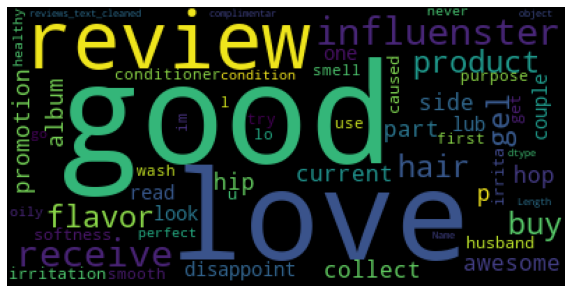

In [52]:
# Plotting th result

print(wordcloud)
plt.figure(figsize= (10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show();

In [53]:
# Creating function to get the most common words
def getMostCommonWords(r, n_most_common):
    # f review column into a list of words, and set each to lowercase
    f_reviews = [word for i in r 
                 for word in 
                         i.lower().split()]


    # remove punctuation from reviews
    f_reviews = [''.join(char for char in i 
                         if 
                                char not in string.punctuation) 
                         for 
                                i in f_reviews]


    # remove any empty strings that were created by this process
    f_reviews = [i for i in f_reviews if i]

    return Counter(f_reviews).most_common(n_most_common)

In [54]:
# Cleaning the user reviews and getting the most common +ve words

positive_reviews = user_sentiment_clean[user_sentiment_clean['user_sentiment']==1]
getMostCommonWords(positive_reviews['reviews_text_cleaned'],10)

[('great', 14397),
 ('love', 12430),
 ('use', 11725),
 ('product', 10805),
 ('movie', 9855),
 ('review', 8881),
 ('part', 8728),
 ('promotion', 8374),
 ('wipe', 8189),
 ('clean', 8077)]

In [55]:
# Cleaning the user reviews and getting the most common -ve words

negative_reviews = user_sentiment_clean[user_sentiment_clean['user_sentiment']==0]
getMostCommonWords(negative_reviews['reviews_text_cleaned'],10)

[('product', 1934),
 ('use', 1794),
 ('hair', 1575),
 ('formula', 1439),
 ('new', 1261),
 ('like', 1090),
 ('old', 1078),
 ('good', 1075),
 ('movie', 1033),
 ('gel', 876)]

In [56]:
# Function to collect the n-gram frequency of words

def get_top_n_ngram( corpus, n_gram_range ,n=None):
    vec = CountVectorizer(ngram_range=(n_gram_range, n_gram_range), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    #print(bag_of_words)
    sum_words = bag_of_words.sum(axis=0) 
    print("--1",sum_words)
    for word, idx in vec.vocabulary_.items():
        #print(word)
        #print(idx)
        break
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    #print("-31",words_freq)
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [57]:
# Print the top 10 +ve words in the bigram frequency

common_words = get_top_n_ngram(positive_reviews['reviews_text_cleaned'], 2, 10)
pd.DataFrame(common_words)

--1 [[1 1 1 ... 1 1 1]]


,0,1
0,review collect,7920
1,collect promotion,7920
2,clorox wipe,2803
3,great product,1944
4,great movie,1739
5,easy use,1554
6,love clorox,1223
7,love product,1137
8,use clorox,1088
9,good movie,922


In [58]:
# Print the top 10 -ve words in the bigram frequency

common_words = get_top_n_ngram(negative_reviews['reviews_text_cleaned'], 2, 10)
pd.DataFrame(common_words)

--1 [[1 1 1 ... 1 1 2]]


,0,1
0,new formula,520
1,old formula,515
2,bring old,369
3,review collect,346
4,collect promotion,346
5,exxtra gel,205
6,use product,183
7,make hair,157
8,shampoo conditioner,147
9,gel year,127


--1 [[1 1 1 ... 1 1 2]]


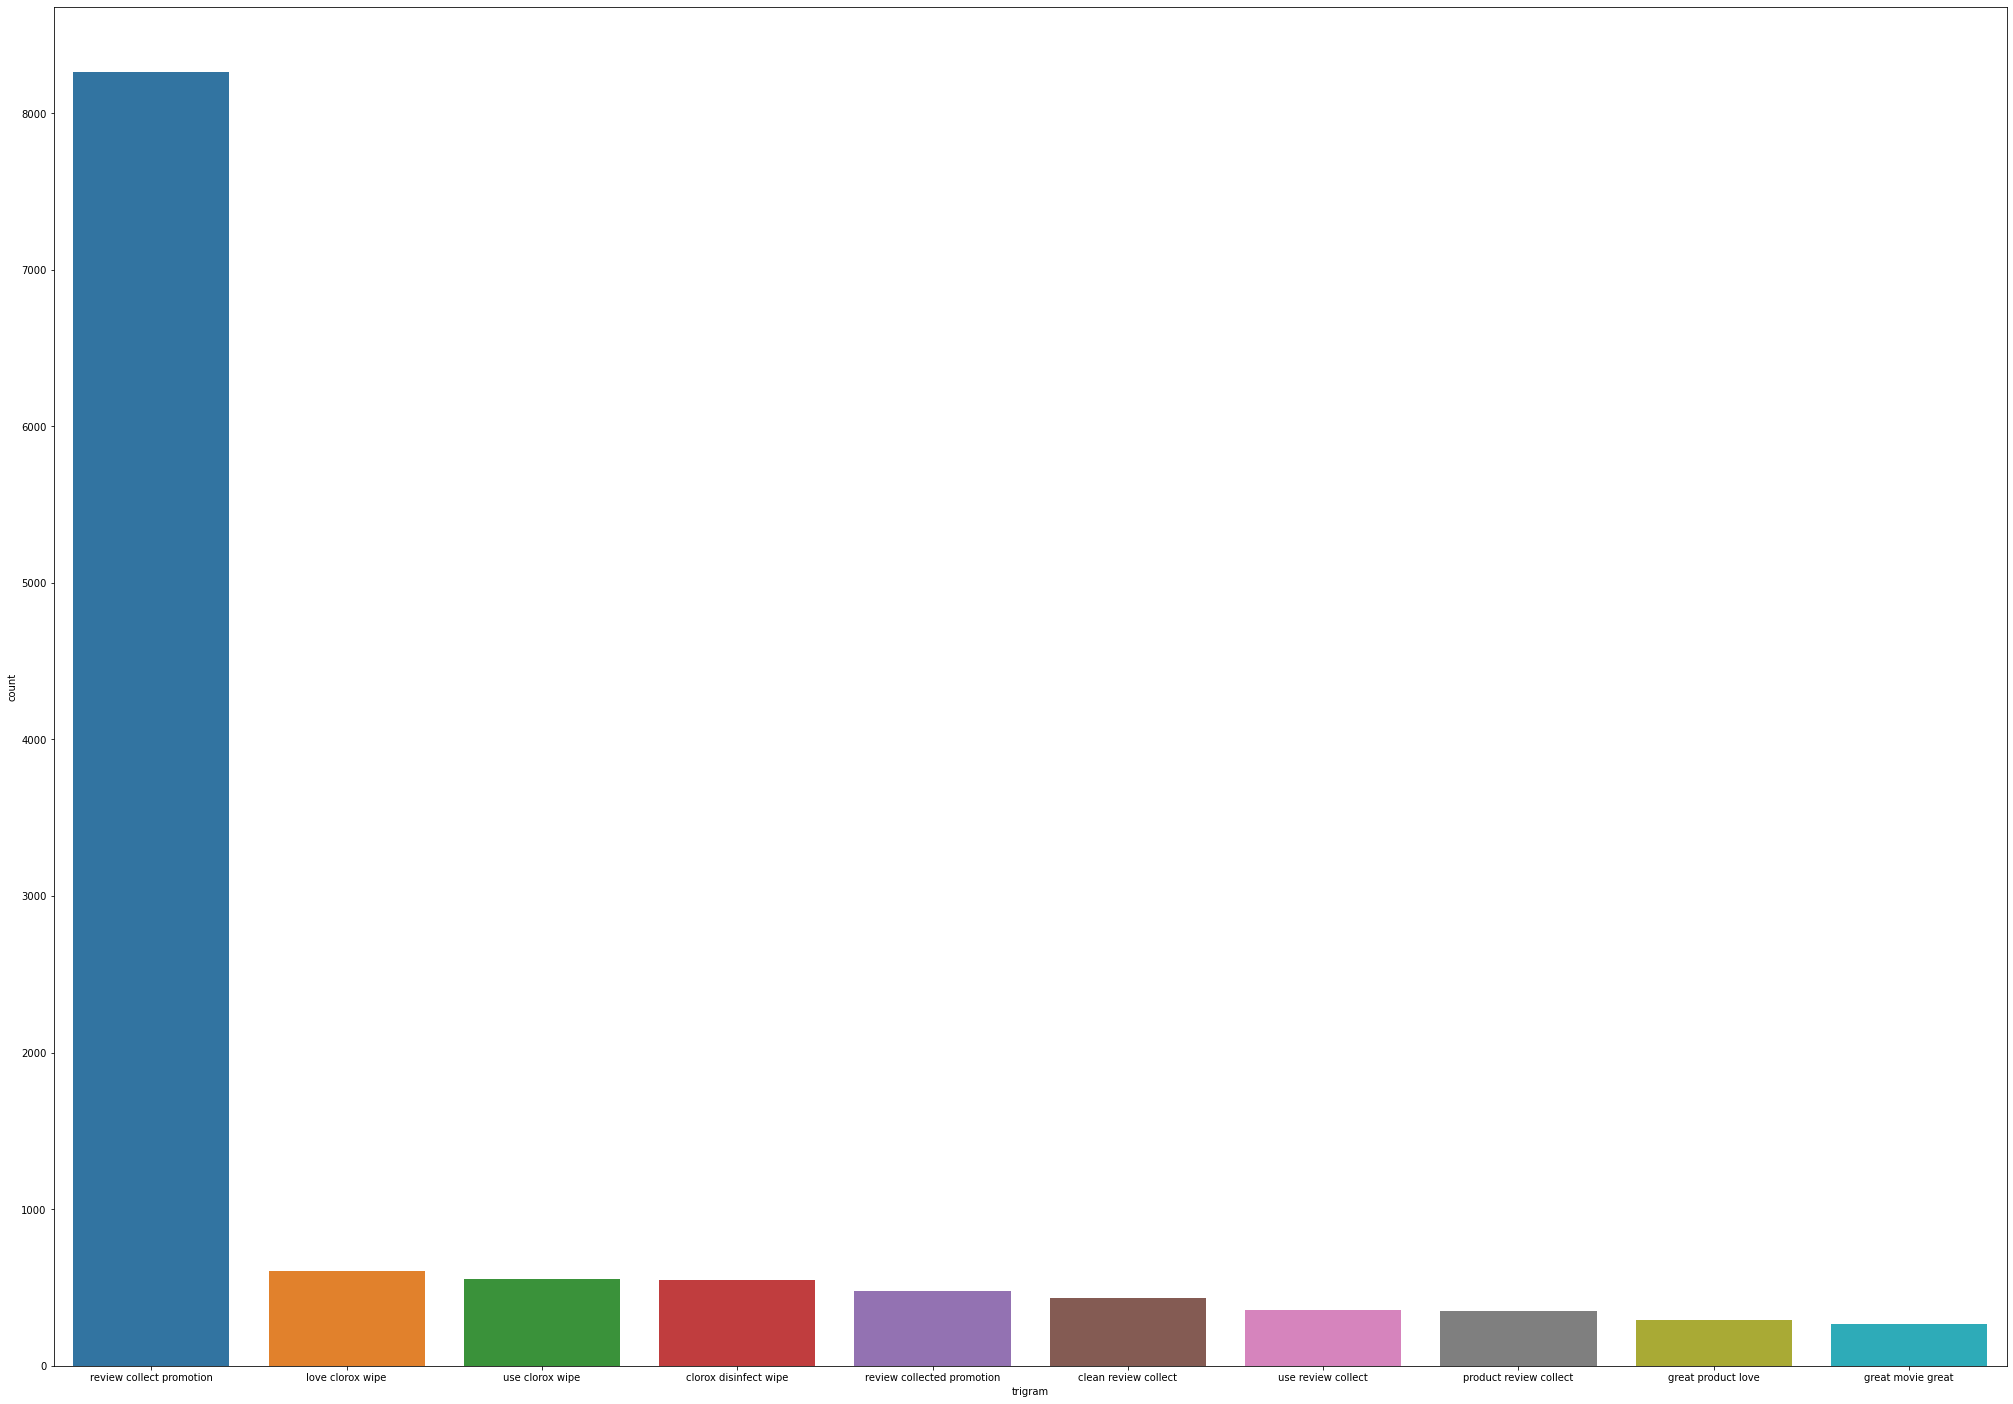

In [59]:
# logic to find the top 10 trigram frequency among the "reviews_text" column in the cleaned datafram("df_clean").

common_words = get_top_n_ngram(user_sentiment_clean.reviews_text_cleaned, 3, 10)
data2 = pd.DataFrame(common_words, columns = ['trigram' , 'count'])
plt.figure(figsize=[35,25])
fig = sns.barplot(x=data2['trigram'], y=data2['count'])

## Feature Extraction

In [60]:
# Dividing the dataset

X = user_sentiment_clean['reviews_text_cleaned']
y = user_sentiment_clean['user_sentiment']

In [61]:
# Getting the total number of review classes

no_of_classes= len(pd.Series(y).value_counts())

In [62]:
# Distribution of the target variable data in terms of percentages.

for i in range(0,no_of_classes):
    print("Percent of {0}s: ".format(i), round(100*pd.Series(y).value_counts()[i]/pd.Series(y).value_counts().sum(),2), "%")

Percent of 0s:  10.47 %
Percent of 1s:  89.53 %


# Using TF-IDF to derive the features from textual data.

### There is a visible class imbalance between +ve and -ve responses. Hence doing a SMOTE oversampling analysis before the Modelling.

In [63]:
# Using TF-IDF vectorizer using the parameters to get 650 features.

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=650, max_df=0.9, min_df=7, binary=True, ngram_range=(1,2))
X_train_tfidf = tfidf_vectorizer.fit_transform(user_sentiment_clean['reviews_text_cleaned'])

y= user_sentiment_clean['user_sentiment']

In [64]:
# Printing the feature names

print(tfidf_vectorizer.get_feature_names())

['able', 'absolutely', 'absolutely love', 'act', 'action', 'action movie', 'actor', 'actually', 'add', 'age', 'ago', 'amaze', 'amazing', 'apply', 'area', 'ask', 'available', 'away', 'awesome', 'awesome movie', 'awesome product', 'awful', 'baby', 'bad', 'bag', 'bathroom', 'bathroom kitchen', 'beautiful', 'bee', 'begin', 'believe', 'best', 'best buy', 'best product', 'big', 'bit', 'black', 'bleach', 'blu', 'blu ray', 'bluray', 'body', 'bottle', 'box', 'boy', 'brand', 'break', 'bring', 'bring cocoa', 'bring old', 'brown', 'burt', 'burt bee', 'buy', 'canister', 'car', 'care', 'carpet', 'carry', 'cast', 'cd', 'chair', 'change', 'character', 'cheap', 'child', 'chip', 'classic', 'classroom', 'clay', 'clean', 'clean bathroom', 'clean disinfect', 'clean easy', 'clean fresh', 'clean great', 'clean kitchen', 'clean love', 'clean mess', 'clean product', 'clean review', 'clean smell', 'clean ups', 'clean use', 'clean wipe', 'cleaner', 'cleaning', 'cleanup', 'clear', 'clorox', 'clorox disinfect', 'c

In [65]:
# Splitting the data into test and train datasets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, y, random_state=42, test_size=0.25)

In [66]:
# Importing the SMOTE library

from imblearn.over_sampling import SMOTE

In [67]:
# Checking the Class Imbalance (using SMOTE)

counter = Counter(y_train)
print('Before',counter)

sm = SMOTE(random_state = 2)

# Transforming the dataset
# X_train, y_train = sm.fit_resample(X_train, y_train)

counter = Counter(y_train)
print('After',counter)

Before Counter({1: 20087, 0: 2365})
After Counter({1: 20087, 0: 2365})


# Model Building

In [68]:
# The Model.py

class ModelBuilder:
    def __init__(self, model, x_train, x_test, y_train, y_test):
        self.model = model
        self.x_train = x_train
        self.x_test = x_test
        self.y_train = y_train
        self.y_test = y_test
        
        
    def train_model(self):
        self.model.fit(self.x_train,self.y_train)
        return self.model.predict(self.x_test)
    
    def evaluate_model(self, y_pred_class):
        print("\n")
        self.result_metrics = self.evaluate_metrics(y_pred_class)
        print("\n")
        
        self.classification_report(y_pred_class)
        print("\n")
        self.confusion_matrix(y_pred_class)
            
        print("\n")
        
        metrics.plot_roc_curve(self.model, self.x_test, self.y_test)
        
        return self.result_metrics
        
    def evaluate_metrics(self, y_pred_class):
        result_metrics = [] 
        accuracy = metrics.accuracy_score(self.y_test, y_pred_class)
        precision = metrics.precision_score(self.y_test, y_pred_class)
        recall = metrics.recall_score(self.y_test, y_pred_class)
        f1score = metrics.f1_score(self.y_test, y_pred_class)
        y_pred_prob = self.model.predict_proba(self.x_test)[:,1]
        roc_auc = metrics.roc_auc_score(self.y_test, y_pred_prob)
        
        print(f"Accuracy is : {accuracy*100:.1f}%")
        print(f"Precision is : {precision*100:.1f}%")
        print(f"Recall is : {recall*100:.1f}%")
        print(f"F1 Score is : {f1score*100:.1f}%")
        print(f"Roc-Auc Score is:{roc_auc*100:.1f}%")
        
        result_metrics.append(accuracy)
        result_metrics.append(precision)
        result_metrics.append(recall)
        result_metrics.append(f1score)
        result_metrics.append(roc_auc)
        return result_metrics
        
    def confusion_matrix(self, y_pred_class):
        confusion_matrix = metrics.confusion_matrix(self.y_test, y_pred_class)
        self.plot_confusion_matrix(confusion_matrix,[0,1])
        
        
    def plot_confusion_matrix(self, data, labels):
        sns.set(color_codes=True)
        plt.title("Confusion Matrix")
        ax = sns.heatmap(data/np.sum(data), annot=True, cmap="Blues", fmt=".2%")
 
        ax.set_xticklabels(labels)
        ax.set_yticklabels(labels)
 
        ax.set(ylabel="True Values", xlabel="Predicted Values")
        plt.show()
        
    def classification_report(self, y_pred_class):
        print(metrics.classification_report(self.y_test, y_pred_class))
               

# Logistic Regression

In [69]:
# Building the Logistic Regression model.

logreg_ci = LogisticRegression(random_state=42, max_iter=100,solver='liblinear', class_weight="balanced")
lr_ci_modebuilder = ModelBuilder(logreg_ci, X_train, X_test, y_train, y_test)



Accuracy is : 85.1%
Precision is : 97.4%
Recall is : 85.7%
F1 Score is : 91.1%
Roc-Auc Score is:91.0%


              precision    recall  f1-score   support

           0       0.39      0.80      0.52       770
           1       0.97      0.86      0.91      6714

    accuracy                           0.85      7484
   macro avg       0.68      0.83      0.72      7484
weighted avg       0.91      0.85      0.87      7484





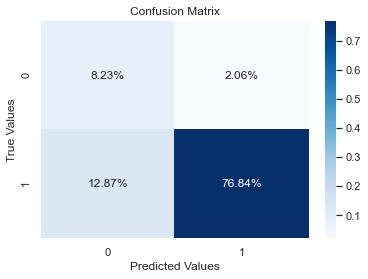

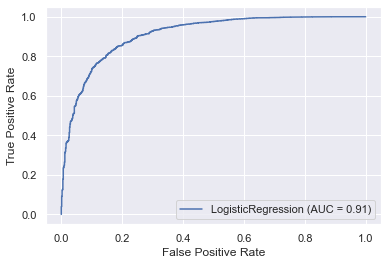

In [70]:
# Train and Predict the Test Labels

y_pred_class  = lr_ci_modebuilder.train_model()
lr_metrics = lr_ci_modebuilder.evaluate_model(y_pred_class)

# Naive Bayes 

In [71]:
# Training the Naive Bayes model and making predictions

mnb = MultinomialNB(alpha=1.0)
mnb_modebuilder = ModelBuilder(mnb, X_train, X_test, y_train, y_test)



Accuracy is : 92.3%
Precision is : 93.4%
Recall is : 98.4%
F1 Score is : 95.8%
Roc-Auc Score is:89.5%


              precision    recall  f1-score   support

           0       0.74      0.39      0.51       770
           1       0.93      0.98      0.96      6714

    accuracy                           0.92      7484
   macro avg       0.84      0.69      0.74      7484
weighted avg       0.91      0.92      0.91      7484





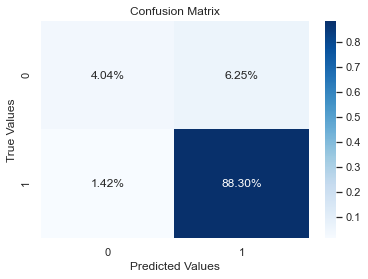

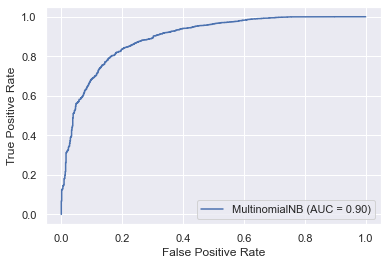

In [72]:
# Train and Predict the Test Labels

y_pred_class  = mnb_modebuilder.train_model()
nb_metrics = mnb_modebuilder.evaluate_model(y_pred_class)

#  Random Forest

In [73]:
# Initializing the Random Forest

rf = RandomForestClassifier(oob_score=True, random_state=42, criterion="gini")

In [74]:
# Setting up the parameters

params = {
    'max_depth': [2,3,5,10],
    'min_samples_leaf': [5,10,20,50],
    'n_estimators': [10, 25, 50, 100]
}

In [75]:
# Setting up thr grid parameters

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="f1")

In [76]:
# Fitting the Training dataset

%time
grid_search.fit(X_train, y_train)

Wall time: 0 ns
Fitting 4 folds for each of 64 candidates, totalling 256 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 256 out of 256 | elapsed:   21.1s finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=True, random_state=42,
                                   

In [77]:
# Estimating the results

rf_best = grid_search.best_estimator_
rf_modebuilder = ModelBuilder(rf_best, X_train, X_test, y_train, y_test)



Accuracy is : 91.9%
Precision is : 91.8%
Recall is : 100.0%
F1 Score is : 95.7%
Roc-Auc Score is:88.9%


              precision    recall  f1-score   support

           0       0.98      0.22      0.36       770
           1       0.92      1.00      0.96      6714

    accuracy                           0.92      7484
   macro avg       0.95      0.61      0.66      7484
weighted avg       0.92      0.92      0.89      7484





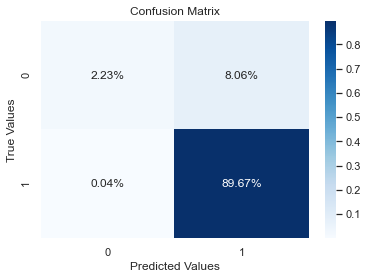

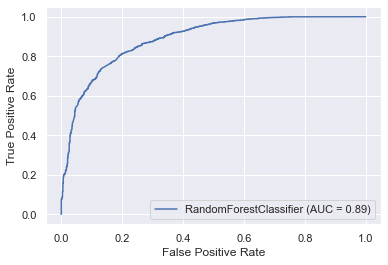

In [78]:
# Train and Predict the Test Labels

y_pred_class  = rf_modebuilder.train_model()
rf_metrics = rf_modebuilder.evaluate_model(y_pred_class)

# XGBoost Classifier

In [79]:
# Import libraries

import xgboost as xgb

In [80]:
# Training the XGBoost model and making predictions

xgclf = xgb.XGBClassifier(learning_rate=0.15, max_depth=10, random_state=42) 
xg_modebuilder = ModelBuilder(xgclf, X_train, X_test, y_train, y_test)



Accuracy is : 93.5%
Precision is : 94.1%
Recall is : 98.9%
F1 Score is : 96.5%
Roc-Auc Score is:91.6%


              precision    recall  f1-score   support

           0       0.83      0.46      0.59       770
           1       0.94      0.99      0.96      6714

    accuracy                           0.93      7484
   macro avg       0.89      0.72      0.78      7484
weighted avg       0.93      0.93      0.93      7484





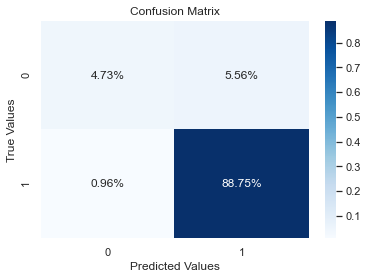

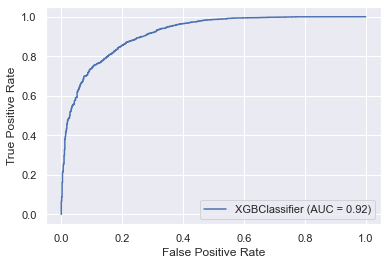

In [81]:
# Train and Predict the Test Labels
y_pred_class  = xg_modebuilder.train_model()
xg_metrics = xg_modebuilder.evaluate_model(y_pred_class)

# Model Inference

In [82]:
# Reviewing the metrics of the model

xg_metrics

[0.9347942276857295,
 0.9410597903088693,
 0.9892761394101877,
 0.9645657856520476,
 0.9157982544711768]

In [83]:
# Creating a table which contain all the metrics

metrics_table = {'Metric': ['Accuracy','Precision','Recall','F1Score','Auc Score'], 'Logistic Regression': lr_metrics,
                 'Naive Bayes': nb_metrics, 'Random Forrest': rf_metrics,'XG Boost': xg_metrics
                }

df_metrics = pd.DataFrame(metrics_table ,columns = ['Metric', 'Logistic Regression', 'Naive Bayes','Random Forrest','XG Boost'])

df_metrics

,Metric,Logistic Regression,Naive Bayes,Random Forrest,XG Boost
0,Accuracy,0.85,0.92,0.92,0.93
1,Precision,0.97,0.93,0.92,0.94
2,Recall,0.86,0.98,1.00,0.99
3,F1Score,0.91,0.96,0.96,0.96
4,Auc Score,0.91,0.90,0.89,0.92


#### Observation:
- From the above analysis, it's clear that "XG Boost" is the best model of all the tried models above.

# Saving the model

In [84]:
# Defining a function to generate the pickle file

def save_object(obj, filename):
    filename = "pickle\\"+filename+'.pkl'
    pickle.dump(obj, open(filename, 'wb'))

In [85]:
# Implementing the function

save_object(xgclf, 'sentiment-classification-xg-boost-model')

In [86]:
# Implementing the function

save_object(tfidf_vectorizer, 'tfidf-vectorizer')

In [87]:
# Implementing the function

save_object(user_sentiment_clean, 'cleaned-data')

# Building the Recommendation System

In [88]:
# Getting the info of the input column

user_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29936 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    29936 non-null  object
 1   brand                 29936 non-null  object
 2   categories            29936 non-null  object
 3   manufacturer          29795 non-null  object
 4   name                  29936 non-null  object
 5   reviews_date          29896 non-null  object
 6   reviews_didPurchase   15931 non-null  object
 7   reviews_doRecommend   27395 non-null  object
 8   reviews_rating        29936 non-null  int64 
 9   reviews_text          29936 non-null  object
 10  reviews_title         29936 non-null  object
 11  reviews_userCity      1900 non-null   object
 12  reviews_userProvince  166 non-null    object
 13  reviews_username      29936 non-null  object
 14  user_sentiment        29936 non-null  int64 
 15  reviews_full_text     29936 non-null

#### Observation:
- For our Recommendation, we will use the id, name, reviews_rating and reviews_username columns.

In [89]:
# Getting the desired subset of the main dataset

user_sentiment_recommendation = user_sentiment[["id", "name", "reviews_rating", "reviews_username"]]
user_sentiment_recommendation.isnull().sum()

id                  0
name                0
reviews_rating      0
reviews_username    0
dtype: int64

In [90]:
# Splitting the subset data into train and test datasets

train, test = train_test_split(user_sentiment_recommendation, test_size=0.25, random_state=42)

In [91]:
# Getting the shape of the newly created datasets

print(train.shape)
print(test.shape)

(22452, 4)
(7484, 4)


In [92]:
product_column = "id"
user_column = "reviews_username"
value_column = "reviews_rating"

In [93]:
# Pivot the train ratings' dataset into matrix format in which columns are product names and the rows are user names.

df_pivot = pd.pivot_table(train,index=user_column, columns = product_column, values = value_column).fillna(0)
df_pivot.head(10)

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06stidriver,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
08dallas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
09mommy11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.11E+24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Creating dummy Train and Test datasets

In [94]:
# Copy the train dataset into dummy_train

dummy_train = train.copy()

In [95]:
# Reviewing the result

dummy_train.head()

,id,name,reviews_rating,reviews_username
27954,AVpfRTh1ilAPnD_xYic2,Planes: Fire Rescue (2 Discs) (includes Digita...,5,silvahalo
3375,AVpe5s3RLJeJML43x4eA,Pantene Pro-V Expert Collection Age Defy Condi...,4,stacberg
20192,AVpfJP1C1cnluZ0-e3Xy,Clorox Disinfecting Bathroom Cleaner,5,erwerw
457,AV1l8zRZvKc47QAVhnAv,Olay Regenerist Deep Hydration Regenerating Cream,5,olay53
19060,AVpfJP1C1cnluZ0-e3Xy,Clorox Disinfecting Bathroom Cleaner,5,nicelady


In [96]:
# The products not rated by user is marked as 1 for prediction. 

dummy_train[value_column] = dummy_train[value_column].apply(lambda x: 0 if x>=1 else 1)

In [97]:
# Pivot the train ratings' dataset into matrix format in which columns are product names and the rows are user names.

dummy_train = pd.pivot_table(dummy_train,index=user_column, columns = product_column, values = value_column).fillna(1)
dummy_train.head(10)

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
01impala,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02dakota,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02deuce,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0325home,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
06stidriver,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
08dallas,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
09mommy11,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1.11E+24,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## User similarity matrix implementation

In [98]:
# Getting the overall count

df_pivot.index.nunique()

19427

In [99]:
# Using the "cosine_similarity" function to compute the distance.

user_correlation = cosine_similarity(df_pivot)
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)
print(user_correlation.shape)

[[1.        0.        0.        ... 0.        0.9486833 0.       ]
 [0.        1.        1.        ... 0.        0.        0.       ]
 [0.        1.        1.        ... 0.        0.        0.       ]
 ...
 [0.        0.        0.        ... 1.        0.        1.       ]
 [0.9486833 0.        0.        ... 0.        1.        0.       ]
 [0.        0.        0.        ... 1.        0.        1.       ]]
(19427, 19427)


## The "User - to - User" Prediction

In [100]:
# Filtering out the user_correlation that are negatively correlated

user_correlation[user_correlation<0]=0
user_correlation

array([[1.       , 0.       , 0.       , ..., 0.       , 0.9486833,
        0.       ],
       [0.       , 1.       , 1.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 1.       , 1.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 1.       , 0.       ,
        1.       ],
       [0.9486833, 0.       , 0.       , ..., 0.       , 1.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 1.       , 0.       ,
        1.       ]])

In [101]:
# Processing the resultand dataset

user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))
user_predicted_ratings

array([[0.        , 0.        , 1.20913332, ..., 2.9103958 , 0.        ,
        0.54410719],
       [0.        , 0.        , 3.12347524, ..., 3.00158035, 0.        ,
        0.        ],
       [0.        , 0.        , 3.12347524, ..., 3.00158035, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        2.88675135],
       [0.        , 0.        , 0.        , ..., 1.64034869, 0.        ,
        0.57353933],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        2.88675135]])

In [102]:
# Since we are interested in products that are not rated by the user, we will multiply with dummy train to make it 0

user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,1.21,13.58,0.0,0.0,0.0,2.26,0.44,3.14,...,0.45,0.42,0.00,0.0,0.0,0.0,2.12,2.91,0.0,0.54
01impala,0.0,0.0,3.12,15.58,0.0,0.0,0.0,0.00,2.34,2.12,...,1.42,0.27,0.00,0.0,0.0,0.0,0.00,3.00,0.0,0.00
02dakota,0.0,0.0,3.12,15.58,0.0,0.0,0.0,0.00,2.34,2.12,...,1.42,0.27,0.00,0.0,0.0,0.0,0.00,3.00,0.0,0.00
02deuce,0.0,0.0,3.12,15.58,0.0,0.0,0.0,0.00,2.34,2.12,...,1.42,0.27,0.00,0.0,0.0,0.0,0.00,3.00,0.0,0.00
0325home,0.0,0.0,0.00,11.34,0.0,0.0,0.0,6.01,6.94,2.10,...,0.00,0.45,3.54,0.0,0.0,0.0,2.24,0.00,0.0,2.89


## The "Top 20" Recommendations for The "User"

In [103]:
# Checking for 08dallas user

user_input = "08dallas" 
print(user_input)

08dallas


In [104]:
# Sorting the values for better visibility of the result

recommendations = user_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
recommendations

id
AVpfPaoqLJeJML435Xk9    24.41
AVpfRTh1ilAPnD_xYic2    20.73
AVpf3VOfilAPnD_xjpun     8.48
AVpe41TqilAPnD_xQH3d     6.58
AVpf0eb2LJeJML43EVSt     5.06
AVpfBrUZilAPnD_xTUly     4.57
AVpfJP1C1cnluZ0-e3Xy     3.68
AV1l8zRZvKc47QAVhnAv     3.54
AVpf5olc1cnluZ0-tPrO     3.40
AVpf7I3i1cnluZ0-tnL6     2.89
AVpf385g1cnluZ0-s0_t     2.87
AVpfPnrU1cnluZ0-g9rL     2.86
AVpe7GIELJeJML43yZfu     2.59
AVpf2tw1ilAPnD_xjflC     2.54
AVpfhxaELJeJML43-zsM     2.22
AVpe8xjUilAPnD_xRkxC     2.22
AVpfm8yiLJeJML43AYyu     1.68
AV1Yn94nvKc47QAVgtst     1.68
AV1ZSp2uglJLPUi8IQFy     1.53
AVpfCuzrilAPnD_xTroT     1.18
Name: 08dallas, dtype: float64

In [105]:
# Getting the index of the user

recommendations.index

Index(['AVpfPaoqLJeJML435Xk9', 'AVpfRTh1ilAPnD_xYic2', 'AVpf3VOfilAPnD_xjpun',
       'AVpe41TqilAPnD_xQH3d', 'AVpf0eb2LJeJML43EVSt', 'AVpfBrUZilAPnD_xTUly',
       'AVpfJP1C1cnluZ0-e3Xy', 'AV1l8zRZvKc47QAVhnAv', 'AVpf5olc1cnluZ0-tPrO',
       'AVpf7I3i1cnluZ0-tnL6', 'AVpf385g1cnluZ0-s0_t', 'AVpfPnrU1cnluZ0-g9rL',
       'AVpe7GIELJeJML43yZfu', 'AVpf2tw1ilAPnD_xjflC', 'AVpfhxaELJeJML43-zsM',
       'AVpe8xjUilAPnD_xRkxC', 'AVpfm8yiLJeJML43AYyu', 'AV1Yn94nvKc47QAVgtst',
       'AV1ZSp2uglJLPUi8IQFy', 'AVpfCuzrilAPnD_xTroT'],
      dtype='object', name='id')

In [106]:
# Displaying the top 20 product "id", "name" and "similarity_score" 

final_recommendations = pd.DataFrame({'product_id': recommendations.index, 'similarity_score' : recommendations})
final_recommendations.reset_index(drop=True)

,product_id,similarity_score
0,AVpfPaoqLJeJML435Xk9,24.41
1,AVpfRTh1ilAPnD_xYic2,20.73
2,AVpf3VOfilAPnD_xjpun,8.48
3,AVpe41TqilAPnD_xQH3d,6.58
4,AVpf0eb2LJeJML43EVSt,5.06
5,AVpfBrUZilAPnD_xTUly,4.57
6,AVpfJP1C1cnluZ0-e3Xy,3.68
7,AV1l8zRZvKc47QAVhnAv,3.54
8,AVpf5olc1cnluZ0-tPrO,3.40
9,AVpf7I3i1cnluZ0-tnL6,2.89


In [107]:
# Merging the required datasets

pd.merge(final_recommendations, train, on="id")[["id", "name", "similarity_score"]].drop_duplicates()

,id,name,similarity_score
0,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet ...,24.41
2464,AVpfRTh1ilAPnD_xYic2,Planes: Fire Rescue (2 Discs) (includes Digita...,20.73
3315,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,8.48
9689,AVpe41TqilAPnD_xQH3d,Mike Dave Need Wedding Dates (dvd + Digital),6.58
10262,AVpf0eb2LJeJML43EVSt,The Resident Evil Collection 5 Discs (blu-Ray),5.06
10899,AVpfBrUZilAPnD_xTUly,"Coty Airspun Face Powder, Translucent Extra Co...",4.57
11022,AVpfJP1C1cnluZ0-e3Xy,Clorox Disinfecting Bathroom Cleaner,3.68
12585,AV1l8zRZvKc47QAVhnAv,Olay Regenerist Deep Hydration Regenerating Cream,3.54
13067,AVpf5olc1cnluZ0-tPrO,Chester's Cheese Flavored Puffcorn Snacks,3.40
13196,AVpf7I3i1cnluZ0-tnL6,Mrs. Meyer's174 Lemon Verbena Laundry Scent Bo...,2.89


## User-User Evaluation

In [108]:
# Find out the common users of test and train dataset.

common = test[test.reviews_username.isin(train.reviews_username)]

In [109]:
# Viewing the shape of the "common" dataset
common.shape

(1795, 4)

In [110]:
# reviewing the resultant dataset

common.head()

,id,name,reviews_rating,reviews_username
12875,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,5,jessica
22577,AVpfOmKwLJeJML435GM7,Clear Scalp & Hair Therapy Total Care Nourishi...,4,at527
21657,AVpfm8yiLJeJML43AYyu,Nexxus Exxtra Gel Style Creation Sculptor,1,romance318
23320,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet ...,3,countprice
21505,AVpfm8yiLJeJML43AYyu,Nexxus Exxtra Gel Style Creation Sculptor,1,farbar


In [111]:
# Converting it into the user-movie matrix.

common_user_based_matrix = pd.pivot_table(common,index=user_column, columns = product_column, values = value_column)
common_user_based_matrix.head()

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1YneDPglJLPUi8IJyQ,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,...,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1234567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123charlie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1witch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85lisa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
# Converting the user_correlation matrix into dataframe.
user_correlation_df = pd.DataFrame(user_correlation)
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,19417,19418,19419,19420,19421,19422,19423,19424,19425,19426
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.95,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.95,0.0
1,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
2,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
3,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.00,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.00,1.0


In [113]:
# Pivoting the resultant dataset

user_correlation_df[user_column] = df_pivot.index
user_correlation_df.set_index(user_column,inplace=True)
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,19417,19418,19419,19420,19421,19422,19423,19424,19425,19426
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.95,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.95,0.0
01impala,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
02dakota,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
02deuce,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
0325home,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.00,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.00,1.0


In [114]:
# Converting the result into list
list_name = common.reviews_username.tolist()

user_correlation_df.columns = df_pivot.index.tolist()
user_correlation_df_1 =  user_correlation_df[user_correlation_df.index.isin(list_name)]

In [115]:
# Checking the shape of the resultant
user_correlation_df_1.shape

(1530, 19427)

In [116]:
# Getting the common correlation - 2

user_correlation_df_2 = user_correlation_df_1.T[user_correlation_df_1.T.index.isin(list_name)]

In [117]:
# Getting the common correlation - 3

user_correlation_df_3 = user_correlation_df_2.T

In [118]:
user_correlation_df_3[user_correlation_df_3<0]=0

common_user_predicted_ratings = np.dot(user_correlation_df_3, common_user_based_matrix.fillna(0))
common_user_predicted_ratings

array([[0.        , 7.79183531, 0.        , ..., 0.        , 0.        ,
        2.29277852],
       [0.        , 0.        , 0.        , ..., 3.12347524, 0.        ,
        0.        ],
       [0.        , 1.31227896, 0.        , ..., 0.        , 0.        ,
        1.49255579],
       ...,
       [0.        , 0.        , 0.        , ..., 3.12347524, 0.        ,
        0.        ],
       [0.        , 1.86700847, 0.        , ..., 0.        , 0.        ,
        1.74077656],
       [0.        , 0.        , 0.        , ..., 3.12347524, 0.        ,
        0.        ]])

In [119]:
# Applying the function where values with more than 1 common attributes are filtered
dummy_test = common.copy()

dummy_test[value_column] = dummy_test[value_column].apply(lambda x: 1 if x>=1 else 0)
dummy_test = pd.pivot_table(dummy_test,index=user_column, columns = product_column, values = value_column).fillna(0)

In [120]:
# Checking the shape of the resultant

dummy_test.shape

(1530, 129)

In [121]:
# Reviewing the resultant

common_user_based_matrix.head()

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1YneDPglJLPUi8IJyQ,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,...,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1234567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123charlie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1witch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85lisa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
# Reviewing the resultant

dummy_test.head()

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1YneDPglJLPUi8IJyQ,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,...,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1witch,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85lisa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [123]:
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)

In [124]:
# Reviewing the resultant

common_user_predicted_ratings.head()

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1YneDPglJLPUi8IJyQ,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,...,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1witch,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85lisa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [125]:
#calculate the Root Mean Square Estimate using the MinMaxScalar

from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_user_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(copy=True, feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [126]:
common_ = pd.pivot_table(common,index=user_column, columns = product_column, values = value_column)

In [127]:
# Finding total non-NaN value

total_non_nan = np.count_nonzero(~np.isnan(y))

In [128]:

rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

2.084355655939576


## Recommendation based on the "Item"

In [129]:
# Pivoting and hence obtaining the required dataset

df_pivot = pd.pivot_table(train,
    index=product_column,
    columns=user_column,
    values=value_column
)

df_pivot.head()

reviews_username,00sab00,01impala,02dakota,02deuce,0325home,06stidriver,08dallas,09mommy11,1.11E+24,1085,...,zsarah,zsazsa,zubb,zuttle,zwithanx,zxcsdfd,zxjki,zyiah4,zzdiane,zzz1127
id,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YIch7GV-KLJ3addeG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [130]:
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

In [131]:
# Reviewing the resultant

df_subtracted.head()

reviews_username,00sab00,01impala,02dakota,02deuce,0325home,06stidriver,08dallas,09mommy11,1.11E+24,1085,...,zsarah,zsazsa,zubb,zuttle,zwithanx,zxcsdfd,zxjki,zyiah4,zzdiane,zzz1127
id,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YIch7GV-KLJ3addeG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
# Getting the Item Similarity Matrix

item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [133]:
# Getting the correlation matrix

item_correlation[item_correlation<0]=0
item_correlation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

## "Item - to - Item" Prediction

In [134]:
# Getting the predicted dataset

item_predicted_ratings = np.dot((df_pivot.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.00568296, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00946238],
       [0.        , 0.        , 0.        , ..., 0.00716692, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00756991]])

## Filtering the rating only for the products NOT rated by the user for Recommendation.

In [135]:
# Filtering the dataset to get the desired resultant dataset

item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,9.14e-03,0.0,0.0,0.0,0.00e+00,0.00e+00,5.83e-03,...,0.0,0.00,0.00e+00,0.0,0.0,0.0,1.93e-02,5.68e-03,0.0,0.00e+00
01impala,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.00e+00,0.00e+00,4.56e-03,...,0.0,0.09,0.00e+00,0.0,0.0,0.0,0.00e+00,0.00e+00,0.0,0.00e+00
02dakota,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.00e+00,0.00e+00,7.59e-03,...,0.0,0.15,0.00e+00,0.0,0.0,0.0,0.00e+00,0.00e+00,0.0,0.00e+00
02deuce,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.00e+00,0.00e+00,6.07e-03,...,0.0,0.12,0.00e+00,0.0,0.0,0.0,0.00e+00,0.00e+00,0.0,0.00e+00
0325home,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.0,1.32e-03,3.77e-03,1.80e-03,...,0.0,0.00,3.78e-03,0.0,0.0,0.0,5.95e-03,0.00e+00,0.0,9.46e-03


## Finding the "Top 20" Recommendations for a "Particular User"

In [136]:
# Take the user ID as input (eg. 08dallas)

user_input = '08dallas'
print(user_input)


08dallas


In [137]:
# Recommending the Top 20 products to the user.

item_recommendations = item_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
item_recommendations

id
AVpfE7puilAPnD_xUcCW    5.30e-01
AVpfNc9cLJeJML434tza    2.86e-01
AVpe9W4D1cnluZ0-avf0    1.40e-01
AVpfPaoqLJeJML435Xk9    4.98e-02
AVpe41TqilAPnD_xQH3d    4.80e-02
AVpe59io1cnluZ0-ZgDU    4.29e-02
AVpf7I3i1cnluZ0-tnL6    4.06e-02
AVpe8xjUilAPnD_xRkxC    3.57e-02
AVpe7GIELJeJML43yZfu    3.26e-02
AVpf2tw1ilAPnD_xjflC    7.39e-03
AV1l8zRZvKc47QAVhnAv    5.59e-03
AVpfR5m0LJeJML436K3W    5.06e-03
AVpe_N91LJeJML43z4jD    0.00e+00
AVpf0thK1cnluZ0-r8vR    0.00e+00
AVpf4WWN1cnluZ0-s7Wj    0.00e+00
AVpf3okQLJeJML43FMif    0.00e+00
AVpf3VOfilAPnD_xjpun    0.00e+00
AVpf385g1cnluZ0-s0_t    0.00e+00
AVpf1ryk1cnluZ0-sONd    0.00e+00
AVpf1pwXLJeJML43EqpT    0.00e+00
Name: 08dallas, dtype: float64

In [138]:
# Converting the above result into a dataframe

item_final_recommendations = pd.DataFrame({'product_id': item_recommendations.index, 'similarity_score' : item_recommendations})
item_final_recommendations.reset_index(drop=True)

,product_id,similarity_score
0,AVpfE7puilAPnD_xUcCW,5.30e-01
1,AVpfNc9cLJeJML434tza,2.86e-01
2,AVpe9W4D1cnluZ0-avf0,1.40e-01
3,AVpfPaoqLJeJML435Xk9,4.98e-02
4,AVpe41TqilAPnD_xQH3d,4.80e-02
5,AVpe59io1cnluZ0-ZgDU,4.29e-02
6,AVpf7I3i1cnluZ0-tnL6,4.06e-02
7,AVpe8xjUilAPnD_xRkxC,3.57e-02
8,AVpe7GIELJeJML43yZfu,3.26e-02
9,AVpf2tw1ilAPnD_xjflC,7.39e-03


In [139]:
# final_recommendations.drop(['id'], axis=1)

pd.merge(item_final_recommendations, train, on="id")[["id", "name", "similarity_score"]].drop_duplicates()

,id,name,similarity_score
0,AVpfE7puilAPnD_xUcCW,Bilbao Nightstand Gray Oak - South Shore,5.30e-01
5,AVpfNc9cLJeJML434tza,Feit 60-Watt A19 Gu24 Base Led Light Bulb - So...,2.86e-01
11,AVpe9W4D1cnluZ0-avf0,Hoover174 Platinum Collection153 Lightweight B...,1.40e-01
267,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet ...,4.98e-02
2731,AVpe41TqilAPnD_xQH3d,Mike Dave Need Wedding Dates (dvd + Digital),4.80e-02
3304,AVpe59io1cnluZ0-ZgDU,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...,4.29e-02
3798,AVpf7I3i1cnluZ0-tnL6,Mrs. Meyer's174 Lemon Verbena Laundry Scent Bo...,4.06e-02
3819,AVpe8xjUilAPnD_xRkxC,The Honest Company Laundry Detergent,3.57e-02
3833,AVpe7GIELJeJML43yZfu,Eagle Fat Free Sweetened Condensed Milk,3.26e-02
3847,AVpf2tw1ilAPnD_xjflC,Red (special Edition) (dvdvideo),7.39e-03


## Evaluation of the "Item - to - Item" Prediction Model

In [140]:
# Getting the test dataset

common =  test[test.id.isin(train.id)]

In [141]:
# reviewing the shape of the resultant dataset
common.shape

(7472, 4)

In [142]:
# reviewing the resultant dataset

common.head(5)

,id,name,reviews_rating,reviews_username
25787,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet ...,5,youknowhowitgoes
12627,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,5,ashleydale00
15778,AVpf63aJLJeJML43F__Q,"Burt's Bees Lip Shimmer, Raisin",3,angie1108
1138,AV1YmDL9vKc47QAVgr7_,"Aussie Aussome Volume Shampoo, 13.5 Oz",5,falisha
12875,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,5,jessica


In [143]:
# Pivoting the dataset to get the desired values

common_item_based_matrix = common.pivot_table(index=product_column, columns=user_column, values=value_column)

In [144]:
# Creating the correlation matrix

item_correlation_df = pd.DataFrame(item_correlation)
item_correlation_df.head(1)

,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,257,258,259
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [145]:
# Removing the index from the dataset and setting "Id" as index

item_correlation_df[product_column] = df_subtracted.index
item_correlation_df.set_index(product_column,inplace=True)
item_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,257,258,259
id,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV14LG0R-jtxr-f38QfS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV16khLE-jtxr-f38VFn,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YIch7GV-KLJ3addeG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [146]:
# Creating a list of the "Id's"

list_name = common.id.tolist()
item_correlation_df.columns = df_subtracted.index.tolist()
item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_name)]
item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]
item_correlation_df_3 = item_correlation_df_2.T
df_subtracted

reviews_username,00sab00,01impala,02dakota,02deuce,0325home,06stidriver,08dallas,09mommy11,1.11E+24,1085,...,zsarah,zsazsa,zubb,zuttle,zwithanx,zxcsdfd,zxjki,zyiah4,zzdiane,zzz1127
id,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YIch7GV-KLJ3addeG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AVpfshNsLJeJML43CB8q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AVpfthSailAPnD_xg3ON,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AVpftikC1cnluZ0-p31V,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [147]:
# Getting the predicted dataset

item_correlation_df_3[item_correlation_df_3<0]=0

common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))
common_item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02163973, 3.        , 0.        , ..., 0.        , 0.0097714 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00756991, ..., 0.        , 0.        ,
        0.00946238]])

In [148]:
# Getting the predicted dataset

dummy_test = common.copy()
dummy_test[value_column] = dummy_test[value_column].apply(lambda x: 1 if x>=1 else 0)
dummy_test = pd.pivot_table(dummy_test, index=product_column, columns=user_column, values=value_column).fillna(0)
common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)

In [149]:
common_ = pd.pivot_table(common,index=product_column, columns=user_column, values=value_column)

In [150]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_item_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(copy=True, feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan  1. nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [151]:
# Finding total non-NaN value

total_non_nan = np.count_nonzero(~np.isnan(y))

In [152]:
# Calculating the RMSE

rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

3.5526191765515156


#### Observation:
- The "User" based Recommendation model seems to be better in this case, as it has a lower RMSE value (~2)

In [153]:
# Saving the correlation matrix of user based recommender

save_object(user_final_rating, "user_final_rating")

# Recommending the Top 20 Products & Filtering it by the Sentiment Model

### Getting the Top 20 product recommendations from the recommender system and getting the top 5 from the sentiment ML model

In [154]:
# Function to get the Recommendations based on User Sentiments

def get_sentiment_recommendations(user):
    if (user in user_final_rating.index):
        # get the product recommedation using the trained ML model
        recommendations = list(user_final_rating.loc[user].sort_values(ascending=False)[0:20].index)
        temp = user_sentiment_clean[user_sentiment_clean.id.isin(recommendations)]
        #temp["reviews_text_cleaned"] = temp["reviews_text"].apply(lambda x: self.preprocess_text(x))
        #transfor the input data using saved tf-idf vectorizer
        X =  tfidf_vectorizer.transform(temp["reviews_text_cleaned"].values.astype(str))
        temp["predicted_sentiment"]= xgclf.predict(X)
        temp = temp[['name','predicted_sentiment']]
        temp_grouped = temp.groupby('name', as_index=False).count()
        temp_grouped["pos_review_count"] = temp_grouped.name.apply(lambda x: temp[(temp.name==x) & (temp.predicted_sentiment==1)]["predicted_sentiment"].count())
        temp_grouped["total_review_count"] = temp_grouped['predicted_sentiment']
        temp_grouped['pos_sentiment_percent'] = np.round(temp_grouped["pos_review_count"]/temp_grouped["total_review_count"]*100,2)
        return temp_grouped.sort_values('pos_sentiment_percent', ascending=False)
    else:
        print(f"User name {user} doesn't exist")

In [155]:
# Testing the above fuction using one of the users that's trained on.

get_sentiment_recommendations("08dallas")

,name,predicted_sentiment,pos_review_count,total_review_count,pos_sentiment_percent
0,"Batherapy Natural Mineral Bath Sport Liquid, 1...",2,2,2,100.00
2,"Cetaphil Gentle Skin Cleanser, 2oz",7,7,7,100.00
7,Eagle Fat Free Sweetened Condensed Milk,15,15,15,100.00
1,CeraVe SA Renewing Cream,25,25,25,100.00
5,Clorox Disinfecting Wipes Value Pack Scented 1...,8525,8507,8525,99.79
4,Clorox Disinfecting Bathroom Cleaner,2039,2026,2039,99.36
14,Planes: Fire Rescue (2 Discs) (includes Digita...,1142,1132,1142,99.12
15,Red (special Edition) (dvdvideo),672,665,672,98.96
18,The Resident Evil Collection 5 Discs (blu-Ray),845,833,845,98.58
3,Chester's Cheese Flavored Puffcorn Snacks,177,174,177,98.31


In [156]:
# Getting the top 5 Recommendations based on sentiments

get_sentiment_recommendations("08dallas")[:5]

,name,predicted_sentiment,pos_review_count,total_review_count,pos_sentiment_percent
0,"Batherapy Natural Mineral Bath Sport Liquid, 1...",2,2,2,100.00
2,"Cetaphil Gentle Skin Cleanser, 2oz",7,7,7,100.00
7,Eagle Fat Free Sweetened Condensed Milk,15,15,15,100.00
1,CeraVe SA Renewing Cream,25,25,25,100.00
5,Clorox Disinfecting Wipes Value Pack Scented 1...,8525,8507,8525,99.79


In [157]:
# Testing the above fuction on the user that doesn't exists or a new user

get_sentiment_recommendations("demo123")

User name demo123 doesn't exist


In [158]:
# Predicting - Positive

X_sample = tfidf_vectorizer.transform(["Awesome product, will recommend"])
y_pred_sample = xgclf.predict(X_sample)
y_pred_sample

array([1])

In [159]:
# Predicting - Negative

X_sample = tfidf_vectorizer.transform(["worst product, quality is poor"])
y_pred_sample = xgclf.predict(X_sample)
y_pred_sample

array([1])